In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter

data = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/airbnb/AirBNB.csv')
df = pd.DataFrame(data)


In [5]:
df.fillna(0, inplace=True)


In [6]:
# Assign log_price to y - our target variable
y = df['log_price']

# Drop unnecessary columns for now
df.drop('id',inplace=True,axis=1)
df.drop('log_price',inplace=True,axis=1)
df.drop('description',inplace=True,axis=1)
df.drop('first_review',inplace=True,axis=1)
df.drop('host_response_rate',inplace=True,axis=1)
df.drop('host_since',inplace=True,axis=1)
df.drop('last_review',inplace=True,axis=1)
df.drop('latitude',inplace=True,axis=1)
df.drop('longitude',inplace=True,axis=1)
df.drop('name',inplace=True,axis=1)
df.drop('thumbnail_url',inplace=True,axis=1)


In [7]:
pt_dummy = pd.get_dummies(df.property_type).astype(int)
rt_dummy = pd.get_dummies(df.room_type).astype(int)
cp_dummy = pd.get_dummies(df.cancellation_policy).astype(int)
c_dummy = pd.get_dummies(df.city).astype(int)
host_pic_dummy = pd.get_dummies(df.host_has_profile_pic).astype(int)
host_identity_dummy = pd.get_dummies(df.host_identity_verified).astype(int)
instant_dummy = pd.get_dummies(df.instant_bookable).astype(int)
neighbourhood_dummy = pd.get_dummies(df.neighbourhood).astype(int)
zipcode_dummy = pd.get_dummies(df.zipcode).astype(int)
cleaningfee_dummy = pd.get_dummies(df.cleaning_fee).astype(int)



In [8]:
amenities_list = []

for amenity in df.amenities:
    amenity = amenity[1:]
    amenity = amenity[:-1]
    x = amenity.split()
    amenities_list.append(len(x))

df['number_of_amenities'] = amenities_list


In [9]:
df2 = pd.concat([pt_dummy,rt_dummy,cp_dummy,c_dummy,host_pic_dummy,host_identity_dummy,instant_dummy,neighbourhood_dummy,zipcode_dummy],axis=1)
df = pd.concat([df,df2],axis=1)
df.drop(['property_type','room_type','amenities','bed_type','cancellation_policy','city','host_has_profile_pic','host_identity_verified','instant_bookable','neighbourhood','zipcode','cleaning_fee'],inplace=True,axis=1)


In [10]:
display(df.head(5))



,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,number_of_amenities,Apartment,Bed & Breakfast,Boat,...,94130,94131,94132,94133,94134,94158,94401,95202 94158,99135,Near 91304
0,3,1.0,2,100.0,1.0,1.0,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1.0,6,93.0,3.0,3.0,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1.0,10,92.0,1.0,3.0,15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1.0,0,0.0,2.0,2.0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,4,40.0,0.0,1.0,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0,0.5,'Mean Squared Error')

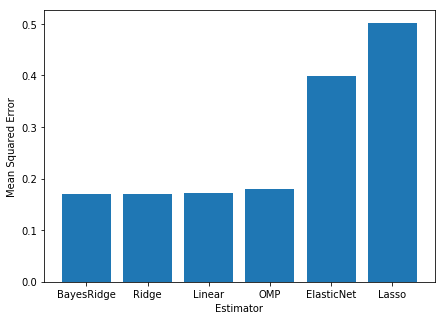

In [11]:
regression_models = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]

regression_model_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])

errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=20)

for e in regression_models:
    e.fit(X_train, y_train)
    this_err = metrics.mean_squared_error(y_test, e.predict(X_test))
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, regression_model_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Mean Squared Error')



In [ ]:
## Let's tune  model of our choice



In [12]:
n_folds = 10
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

clf = GridSearchCV(linear_model.LinearRegression(), parameters, cv=n_folds, refit=True, verbose=True, njobs=-1)
clf.fit(X_train, y_train)

print('Mean cross-validated score of the best_estimator : {}'.format(clf.best_score_))
print('Parameter & Estimator which gave highest score : {} '.format(clf.best_estimator_))
print('')

print('Residual sum of squares: {}'.format(np.mean((clf.predict(X_test) - y_test) ** 2)))



Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 24.8min finished


Mean cross-validated score of the best_estimator : -3162621807552293.5
Parameter & Estimator which gave highest score : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 

Residual sum of squares: 0.1715001221201542


In [19]:
for i in range(len(clf.grid_scores_)):
    print(clf.grid_scores_[i])


mean: -662354294155930752962789376.00000, std: 253422611663782567292698624.00000, params: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
mean: -3162621807552293.50000, std: 9405067080985938.00000, params: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
mean: -4524972854465943.00000, std: 12103300132677444.00000, params: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
mean: -4524972854465943.00000, std: 12103300132677444.00000, params: {'copy_X': True, 'fit_intercept': False, 'normalize': False}
mean: -662354294155930752962789376.00000, std: 253422611663782567292698624.00000, params: {'copy_X': False, 'fit_intercept': True, 'normalize': True}
mean: -3162621807552293.50000, std: 9405067080985938.00000, params: {'copy_X': False, 'fit_intercept': True, 'normalize': False}
mean: -4524972854465943.00000, std: 12103300132677444.00000, params: {'copy_X': False, 'fit_intercept': False, 'normalize': True}
mean: -4524972854465943.00000, std: 12103300132677444.0